<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>

# Blackjack

We apply Q-learning to game of Blackjack from the OpenAI gym package.  

**Blackjack Rules:**  
the rules of the card game Blackjack:
- You are dealt two cards (face up). The dealer is dealt two cards (one face up, one face down)
- You can ask to get one more card (a hit) which gives you one more card face up or you can stop (stick).
- Number cards are worth their face value. King, Queen, Jack are 10. Ace is 1 or 11 (you can choose which).
- If your total goes greater then 21 you loose (reward = -1).
- If you stick with 21 or below, the dealer then tries to beat or equal your score. 
- If the dealer gets a score better or equal to you, then you loose (reward = -1).
- If the dealer does worst or goes above 21, then you win (reward = +1).

## Q-learning
The basic Q-learning update is
$$
Q(x,a)
\leftarrow
Q(x,a)+ \alpha \left( r + \beta \max_{\hat a} Q(\hat x, \hat a) - Q(x,a)  \right) 
$$
for (state,action,reward, next state) given by $(x,a,r,\hat x)$.  
(If there is no next state then the maximization above is zero)


### Import everything
and step up the environment

In [1]:
# Add location to import stochastic_control
import sys
sys.path.append('../../')

# Standard Libraries
import numpy as np

# Housekeeping modules and settings
from tqdm import tqdm
from time import time
from IPython.display import clear_output
%load_ext autoreload
%autoreload 0

# The main modules that we need
import gym
import stochastic_control as sc

env = gym.make('Blackjack-v0')

### helper functions

In [2]:
def episode(env,act,train=False):
    '''Train for one simulation episode
        
    #Arguments:
        env   -- gym enviroment
        train -- function : train(state,action,reward,next_state,done)
        act   -- function : act(state)
        
    #Returns: 
        Cummulative Episode Reward
    '''
    state = env.reset()
    next_state = None
    done = False
    Reward = 0.
    
    while done is False:
        action = act(state)
        next_state, reward, done, _ = env.step(action)
        if train is not False:
            train(state,action,reward,next_state,done)
        state = next_state
        Reward += reward
    
    return Reward
    

def test(act,iters,verbose=False):
    ''' mean and deviation over a number of iterations 
    
    #Arguments:
        act - python function 
        iters - number of iterations
        verbose - use tqdm
        
    #Returns:
        mean_reward, standard_deviation/square_root_number_of_iterations
    '''
    mean = 0.
    mean_sqd = 0.
    
    if verbose :
        for t in tqdm(range(iters)):
            reward = episode(env,act)
            mean += (reward-mean)/(t+1)
            mean_sqd += (reward**2 - mean_sqd)/(t+1)            
    else: 
        for t in (range(iters)):
            reward = episode(env,act)
            mean += (reward-mean)/(t+1)
            mean_sqd += (reward**2 - mean_sqd)/(t+1)    
        
    return mean, np.sqrt((mean_sqd-mean**2)/iters)

def blackjack_print(Q):
    '''helper function to print nicely'''
    
    #print table for no usable ace
    dealer = range(1,11)
    player_false_ace = range(4,22)
    print('WITH NO ACE')
    print('player\dealer', end='\n\t')
    for dlr in dealer:
        print(dlr, end = ' ')
    print('\n')

    for plyr in player_false_ace:
        print(plyr, end='\t')
        for dlr in dealer:
            print(Q.argmax((plyr,dlr,False)), end = ' ')
        print('')
    print('\n')
    
    #print table for no usable ace
    player_true_ace = range(12,22)
    print('WITH ACE')
    print('player\dealer', end='\n\t')
    for dlr in dealer:
        print(dlr, end = ' ')
    print('\n')

    for plyr in player_true_ace:
        print(plyr, end='\t')
        for dlr in dealer:
            print(Q.argmax((plyr,dlr,True)), end = ' ')
        print("")   

## A Basic Working Example
We set a fixed learning rate (0.0001)  
We set chose actions (hit/stick) uniformly at random  
We run for 20 million episodes (takes a few minutes -- yawn!)

In [16]:
# Get Q-function and define action and training functions
Q = sc.Q_Learn(lr=0.00001)
act = lambda state : env.action_space.sample()
train = lambda s,a,r,ns,d : Q.train(s,a,r,ns,d)

# main loop
iterations = range(20000000)
for _ in tqdm(iterations):
    episode(env,act,train)
blackjack_print(Q)

100%|██████████| 20000000/20000000 [17:34<00:00, 18959.70it/s]


WITH NO ACE
player\dealer
	1 2 3 4 5 6 7 8 9 10 

4	1 1 1 1 1 1 1 1 1 1 
5	1 1 1 1 1 1 1 1 1 1 
6	1 1 1 1 1 1 1 1 1 1 
7	1 1 1 1 1 1 1 1 1 1 
8	1 1 1 1 1 1 1 1 1 1 
9	1 1 1 1 1 1 1 1 1 1 
10	1 1 1 1 1 1 1 1 1 1 
11	1 1 1 1 1 1 1 1 1 1 
12	1 0 0 0 0 0 1 1 1 1 
13	1 0 0 0 0 0 1 1 1 1 
14	1 0 0 0 0 0 1 1 1 1 
15	1 0 0 0 0 0 0 1 1 1 
16	1 0 0 0 0 0 0 0 0 0 
17	0 0 0 0 0 0 0 0 0 0 
18	0 0 0 0 0 0 0 0 0 0 
19	0 0 0 0 0 0 0 0 0 0 
20	0 0 0 0 0 0 0 0 0 0 
21	0 0 0 0 0 0 0 0 0 0 


WITH ACE
player\dealer
	1 2 3 4 5 6 7 8 9 10 

12	1 1 1 1 1 1 1 1 1 1 
13	1 1 1 1 1 1 1 1 1 1 
14	1 1 1 1 1 1 1 1 1 1 
15	1 1 1 1 1 1 1 1 1 1 
16	1 1 1 1 1 1 1 1 1 1 
17	1 1 1 1 1 0 1 1 1 1 
18	1 0 0 0 0 0 0 0 1 1 
19	1 0 0 0 0 0 0 0 0 0 
20	0 0 0 0 0 0 0 0 0 0 
21	0 0 0 0 0 0 0 0 0 0 


In [17]:

# Test the policy
Q_opt = Q
iterations = range(10000000)
act = lambda s : Q_opt.act(s,actions=[0,1])

test(act,10000000,verbose=True)
    
print('mean score:\t',mean,' +/- ',np.round(np.sqrt((mean_sqd-mean**2)/t),5))
#print('std dev score:\t',np.round(np.sqrt((mean_sqd-mean**2)/t),5))


100%|██████████| 10000000/10000000 [08:45<00:00, 19020.20it/s]


NameError: name 'mean' is not defined

## With $\frac{1}{t}$ the learning rate 

In [7]:
# Get Q-function and define action and training functions
Q = sc.Q_Learn()
act = lambda state : Q.act(state,explore=1.0,actions=[0,1])
train = lambda s,a,r,ns,d: Q.train(s,a,r,ns,d)

In [ ]:
# main loop
iterations = range(20000000)
for t in tqdm(iterations):
    Q.lr = 1000/(t+1) 
    episode(env,act,train)
blackjack_print(Q)

time= 2040.3325080871582
WITH NO ACE
player\dealer
	1 2 3 4 5 6 7 8 9 10 

4	1 1 1 1 1 1 1 1 1 1 
5	1 1 1 1 1 1 1 1 1 1 
6	1 1 1 1 1 0 1 1 1 1 
7	1 1 1 1 1 1 1 1 1 1 
8	1 1 1 1 1 1 1 1 1 1 
9	1 1 1 1 1 1 1 1 1 1 
10	1 1 1 1 1 1 1 1 1 1 
11	1 1 1 1 1 1 1 1 1 1 
12	1 1 1 1 0 0 1 1 1 1 
13	1 0 0 0 0 0 1 1 1 1 
14	1 0 0 0 0 0 1 1 1 1 
15	1 0 0 0 0 0 1 1 1 1 
16	1 0 0 0 0 0 1 1 1 1 
17	0 0 0 0 0 0 0 0 0 0 
18	0 0 0 0 0 0 0 0 0 0 
19	0 0 0 0 0 0 0 0 0 0 
20	0 0 0 0 0 0 0 0 0 0 
21	0 0 0 0 0 0 0 0 0 0 


WITH ACE
player\dealer
	1 2 3 4 5 6 7 8 9 10 

12	1 1 1 1 1 1 1 1 0 1 
13	1 1 1 1 1 1 1 1 1 1 
14	1 1 1 1 1 1 1 1 1 1 
15	1 1 1 1 1 1 1 1 1 1 
16	1 1 1 1 1 1 1 1 1 1 
17	1 1 1 1 1 1 1 1 1 1 
18	1 1 0 1 1 0 0 0 1 1 
19	0 1 0 1 0 0 0 0 0 0 
20	0 0 0 0 0 0 0 0 0 0 
21	0 0 0 0 0 0 0 0 0 0 


In [ ]:

# Test the policy
Q_opt = Q
iterations = range(10000000)
act = lambda s : Q_opt.act(s,actions=[0,1])
test(act,10000000,verbose=True)
    
print('mean score:\t',mean,' +/- ',np.round(np.sqrt((mean_sqd-mean**2)/t),5))
#print('std dev score:\t',np.round(np.sqrt((mean_sqd-mean**2)/t),5))


## Investigating Performance
We want to investigate the Performance of Q-learning and find good parameters.  

Parameters we need to consider are:
- How long to train for
- Learning rate
- exploration probability
- reducing the exploration probability

### Searching Parameters one-by-one
**Training time** Let's fix a good time budget for each training run. Eg. between 1 to 2 seconds:

In [3]:
# again random actions and the Q-function for learning
Q = sc.Q_Learn(lr=0.01)
act = lambda state : env.action_space.sample()
train = lambda s,a,r,ns,d : Q.train(s,a,r,ns,d)

max_run_time = 10. 
current_run_time = 0.
iterations = 1 

while current_run_time < 1. :
    iterations *= 2 
    tic = time()
    for _ in tqdm(range(iterations)):
        episode(env,act,train)
    toc = time()
    current_run_time = toc-tic
clear_output(wait=True)
print('A good number of iterations is: ',iterations)

A good number of iterations is:  32768


Okay so lets round down and take 100,000

In [8]:
iters = 30000

**Learning rate**: Let's find a good learning rate.

In [9]:
alphas = [1. * 10**(-t) for t in range(-1,3)]
Qs ={ alpha : sc.Q_Learn(lr=alpha) for alpha in alphas} 

def find_alpha(Q_dict,alpha_dict,iters):
    ''' Finds the best learning rate
    '''
    max_mean = -1*np.inf
    max_alpha = alphas[0]

    for alpha in alpha_dict:
        # step up Q-function
        act_training = lambda state : env.action_space.sample()
        train = lambda s,a,r,ns,d : Q_dict[alpha].train(s,a,r,ns,d,lr=alpha)

        for _ in (range(iters)):
            episode(env,act_training,train)

        act_testing = lambda state : Q_dict[alpha].act(state)
        mean, std = test(act_testing,iters)
        print(np.round(alpha,6),np.round(mean,6),'+/-',np.round(std,6))

        if mean > max_mean :       
            max_mean = mean 
            max_alpha = alpha
    
    return max_alpha, max_mean

alpha_star, _ = find_alpha(Qs,alphas,iters)
print('best learning rate is :',alpha_star)

10.0 -0.3712 +/- 0.005205
1.0 -0.207767 +/- 0.005445
0.1 -0.0806 +/- 0.005498
0.01 -0.054133 +/- 0.005488
best learning rate is : 0.01


Let's plot their performance

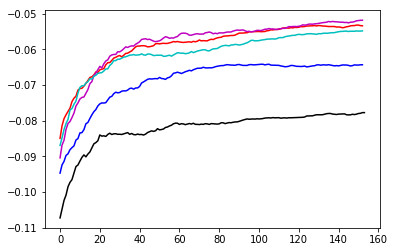

KeyboardInterrupt: 

In [29]:
rplt= sc.rolling_plot(5)

# alphas = [1. * 10**(-2*t) for t in range(-1,3)]
alphas = [0.1, 0.05, 0.01, 0.001,0.0000001]
Qs ={ alpha : sc.Q_Learn(lr=alpha) for alpha in alphas} 

mean = { alpha : 0 for alpha in alphas} 
iters=5000

for i in tqdm(range(1000)):
    for idx, alp in enumerate(alphas):  
        act_training = lambda state : env.action_space.sample()
        train = lambda s,a,r,ns,d : Qs[alp].train(s,a,r,ns,d,lr=alp)
        for t in (range(iters)):
            
            reward = episode(env,Qs[alp].policy(actions=[0,1]))
            mean[alp] += (reward-mean[alp])/(i*iters+t+1)
            
        for t in (range(iters)):
            episode(env,act_training,train)
            


        if i > 10 :
            rplt.plot(mean[alp],idx)
    

In [ ]:
blackjack_print

**Now Repeat:**

In [8]:
repetitions = 10
iters = 50000

alpha_star = 1.
Q_star = sc.Q_Learn()

def Q_alph_update(Q_star,alpha_star,iters):
    print('---finding next alpha---')
    alphas = [alpha_star * 10**(-t) for t in range(-1,3)]
    Qs = { alp : Q_star.copy() for alp in alphas }

    alpha_star, score = find_alpha(Qs,alphas,iters)
    Q_star = Qs[alpha_star]
    
    clear_output(wait=True)
    print('alpha star = ',alpha_star, ', mean =', score)
    return Q_star, alpha_star, score

Best_Qs = []
for _ in tqdm(range(repetitions)):
    Q_star, alpha_star, score = Q_alph_update(Q_star,alpha_star,iters)
    Best_Qs.append(Q_star.copy())


100%|██████████| 10/10 [03:29<00:00, 21.55s/it]

alpha star =  1.0000000000000002e-10 , mean = -0.047580000000000296


In [9]:
blackjack_print(Best_Qs[9])

WITH NO ACE
player\dealer
	1 2 3 4 5 6 7 8 9 10 

4	1 1 1 0 1 1 1 1 1 1 
5	1 1 0 0 0 1 1 1 1 1 
6	1 1 1 1 1 1 1 1 1 1 
7	1 1 1 1 1 1 1 1 1 1 
8	1 1 1 1 1 1 1 1 1 1 
9	1 1 1 1 1 1 1 1 1 1 
10	1 1 1 1 1 1 1 1 1 1 
11	1 1 1 1 1 1 1 1 1 1 
12	1 1 0 1 0 0 1 1 1 1 
13	1 0 0 0 0 0 1 1 1 1 
14	1 0 0 0 0 0 1 1 0 1 
15	1 0 0 0 0 0 1 1 1 1 
16	1 0 0 0 0 0 1 0 1 0 
17	1 0 0 0 0 0 0 0 0 0 
18	0 0 0 0 0 0 0 0 0 0 
19	0 0 0 0 0 0 0 0 0 0 
20	0 0 0 0 0 0 0 0 0 0 
21	0 0 0 0 0 0 0 0 0 0 


WITH ACE
player\dealer
	1 2 3 4 5 6 7 8 9 10 

12	1 1 1 1 1 1 1 1 1 1 
13	1 1 1 1 1 1 1 1 1 1 
14	1 1 1 1 1 1 1 1 1 1 
15	1 1 1 1 1 1 1 1 1 1 
16	1 1 1 1 1 1 1 1 1 1 
17	1 0 0 0 0 1 0 1 1 1 
18	1 0 0 0 0 0 0 1 0 1 
19	0 0 0 0 0 0 0 0 0 0 
20	0 0 0 0 0 0 0 0 0 0 
21	0 0 0 0 0 0 0 0 0 0 


**Exploration**: Now we investigate exploration

In [13]:
iters = 30000
epsilons = np.arange(0.1,1,0.1)

# set up Q-functions actions for training and testing and training function
Qs = dict()
for eps in epsilons:
    Qs[eps] = sc.Q_Learn(lr=alpha_star)

def find_epsilon(Q_dict,eps_dict,iters):
    act_train = dict()
    act_test = dict()
    trains = dict()
    for eps in eps_dict:
        act_train[eps] = lambda state : Q_dict[eps].act(state,explore=eps,actions=[0,1])
        act_test[eps] = lambda state : Q_dict[eps].act(state,actions=[0,1])
        trains[eps] = lambda s,a,r,ns,d : Q_dict[eps].train(s,a,r,ns,d)

    max_mean = -1*np.inf
    max_eps = epsilons[0]

    for eps in eps_dict:

        for _ in (range(iters)):
            episode(env,act_train[eps],trains[eps])

        mean, std = test(act_test[eps],iters)
        print(eps,np.round(mean,6),'+/-',np.round(std,6)) 

        if mean > max_mean :       
            max_mean = mean 
            max_eps = eps
    
    return max_eps, max_mean
    
eps_star, _ = find_epsilon(Qs,epsilons,iters)
print('best exploration prob is :',eps_star)

0.1 -0.088933 +/- 0.005486
0.2 -0.089633 +/- 0.005524
0.30000000000000004 -0.097567 +/- 0.005505
0.4 -0.0743 +/- 0.005518
0.5 -0.082367 +/- 0.005498
0.6 -0.061833 +/- 0.005506
0.7000000000000001 -0.060467 +/- 0.005509
0.8 -0.0596 +/- 0.005525
0.9 -0.0628 +/- 0.005498
best exploration prob is : 0.8


**Now repeat:** Make sure you keep track of the best solutions found

In [14]:
repetitions = 10
iters = 100000

alpha_star = 1.
epsilon_star = 1.
Q_star = sc.Q_Learn()

def Q_alph_update(Q_star,alpha_star,iters):
    print('---finding alpha---')
    alphas = [alpha_star * 10**(-t) for t in range(-1,3)]
    Qs = { alp : Q_star.copy() for alp in alphas }

    alpha_star, score = find_alpha(Qs,alphas,iters)
    Q_star = Qs[alpha_star]
    print('alpha star = ',alpha_star)
    
    return Q_star, alpha_star, score

def Q_eps_update(Q_star,epsilon_star,iters):
    print('---finding epsilon---')
    epsilons = [epsilon_star * m for m in [0.2,0.4,0.6,0.8,1.]]
    Qs = { eps : Q_star.copy() for eps in epsilons }
    
    epsilon_star, score = find_epsilon(Qs,epsilons,iters)
    Q_star = Qs[epsilon_star]
    print('epsilon star = ',epsilon_star)
    
    return Q_star, epsilon_star, score

Best_Qs = []
for _ in tqdm(range(repetitions)):
    Q_star, alpha_star, score = Q_alph_update(Q_star,alpha_star,iters)
    Best_Qs.append(Q_star.copy())
    Q_star, epsilon_star, score = Q_eps_update(Q_star,epsilon_star,iters)
    Best_Qs.append(Q_star.copy())
    clear_output(wait=True)


100%|██████████| 10/10 [14:46<00:00, 87.77s/it]


**Now:** let's evaluate of best solutions

In [16]:
for idx, Qs in enumerate(Best_Qs):
    act = lambda s : Qs.act(s)
    mean = 0.
    mean_sqd = 0.
    for t in (range(100000)):
        reward = episode(env,act)
        mean += (reward-mean)/(t+1)
        mean_sqd += (reward**2 - mean_sqd)/(t+1)

    print(idx,mean,'+/-',np.sqrt(mean_sqd/t)) 

    if mean > max_mean :       
        max_mean = mean 
        max_alpha = alpha


0 -0.05539000000000009 +/- 0.0030132027468970563


NameError: name 'max_mean' is not defined

In [ ]:
blackjack_print(Best_Qs[16])

In [ ]:
train = [lambda s,a,r,ns,d : Q_dict[new].train(s,a,r,ns,d) for new in [0,1]]
acts =[None,None]

means = [0., 0.]
means_sqd = [0., 0.]
sigma = [0.,0.]

tic = time()
toc = 0 
while toc < 600:
    
    print('training')
    for new in [0,1]:
        for _ in (range(iters)):
            episode(env,rand_act,train[new])

    print('testing')   
    for new in [0,1]:
        acts[new] = lambda state : Qs[new].act(state,actions=[0,1])
        for t in (range(iters)):
            reward = episode(env,acts[new],train[new])
            means[new] += (reward-means[new])/(t+1)
            means_sqd[new] += (reward**2 - means_sqd[new])/(t+1)
            
        sigma[new] = np.sqrt(means_sqd[new]/(t+1))

        print(Qs[new].lr,means[new],'+/-',np.sqrt(means_sqd[new]/(t+1)))     

    if means[1]-sigma[1] > means[0]+sigma[0]:
        print('update learning rate to', Qs[1].lr)
        Qs[0] = Qs[1]
        Qs[1] = Qs[1].copy()
        Qs[1].lr /= 2
        
        means = [0., 0.]
        means_sqd = [0., 0.]
    elif means[0]-sigma[0] > means[1]+sigma[1] :
        print('keep current rate')
        Qs[1] = Qs[0].copy()
        
    else:
        iters = int(1.1*iters)
        print('i training to ',iters)
    
    toc = time()-tic
    print('time= ',toc)
        

        
    

In [ ]:
blackjack_print(Qs[0])

In [ ]:
iters = 1000
alphas = [1., .5]
lr_factor = 4
Qs = [sc.Q_Learn(1.), sc.Q_Learn(.5)]
rand_act = lambda state : env.action_space.sample()
train = [lambda s,a,r,ns,d : Qs[new].train(s,a,r,ns,d) for new in [0,1]]
acts =[None,None]

means = [0., 0.]
means_sqd = [0., 0.]
sigma = [0.,0.]
N = [0, 0]

tic = time()
toc = 0 

while toc < 60*10:
    

    for new in [0,1]:
        acts[new] = lambda state : Qs[new].act(state,actions=[0,1])
        for _ in (range(iters)):
            episode(env,rand_act,train[new])   
            reward = episode(env,acts[new],train[new])
            means[new] += (reward-means[new])/(N[new]+1)
            means_sqd[new] += (reward**2 - means_sqd[new])/(N[new]+1)
            sigma[new] = np.sqrt(means_sqd[new]/(N[new]+1))
            N[new]+= 1

        print(Qs[new].lr,means[new],'+/-',np.sqrt(means_sqd[new]/(N[new]+1)))     

    if means[1]-sigma[1] > means[0]+sigma[0]:
        print('update learning rate to', Qs[1].lr)
        
        Qs[0] = Qs[1]
        Qs[1] = Qs[1].copy()
        
        Qs[1].lr /= lr_factor
        
        N[0] = N[1]
        N[1] = 0
        
        means[0] = means[1]
        means_sqd[0] = means_sqd[1]

        means[1] = 0.
        means_sqd[1] = 0.

    elif means[0]-sigma[0] > means[1]+sigma[1] :
        print('keep current rate')
        
        Qs[1] = Qs[0].copy()
        Qs[1].lr = Qs[0].lr/ lr_factor
        
        N[1] = 0

    else:
        iters = int(2*iters)
        print('update iterations training to ',iters)

    toc = time()-tic
    #clear_output(wait=True)
    print('-----------------')
    print('time = ',toc)

        

        
    

## Continuous Update

In [6]:
'''
Countinous update
'''

iters = 100
alphas = [1., .25]
lr_factor = 4.
Qs = [sc.Q_Learn(alphas[0]), sc.Q_Learn(alphas[1])]
rand_act = lambda state : env.action_space.sample()
train = [lambda s,a,r,ns,d : Qs[new].train(s,a,r,ns,d) for new in [0,1]]
acts =[None,None]

means = [0., 0.]
means_sqd = [0., 0.]
sigma = [0.,0.]
N = [0, 0]

In [8]:
tic = time()
toc = 0 
it = 0

In [13]:
while toc < 20*60:    
    it += 1
    
    if it % 100 == 0 :
        print(it/100000, np.round(time()-tic,0))
        for new in [0,1]:
            print(np.round(Qs[new].lr,6),
                  np.round(means[new],6),
                  '+/-',np.round(np.sqrt(means_sqd[new]/(N[new]+1)),6))  
    
    clear_output(wait=True)
    for new in [0,1]:
        acts[new] = lambda state : Qs[new].act(state,actions=[0,1])

        episode(env,rand_act,train[new])   
        reward = episode(env,acts[new],train[new])
        means[new] += (reward-means[new])/(N[new]+1)
        means_sqd[new] += (reward**2 - means_sqd[new])/(N[new]+1)
        sigma[new] = np.sqrt(means_sqd[new]/(N[new]+1))
        N[new]+= 1

        if means[1]-1*sigma[1] > means[0]+ 1*sigma[0]:

            Qs[0] = Qs[1]
            Qs[1] = Qs[1].copy()

            Qs[1].lr /= lr_factor

            N[0] = N[1]
            N[1] = 0

            means[0] = means[1]
            means_sqd[0] = means_sqd[1]

            means[1] = means[1]
            means_sqd[1] = 100.

    toc = time()-tic

6.805 1200.0
1.5e-05 -0.045545 +/- 0.000996
4e-06 -0.046406 +/- 0.000996


In [15]:
blackjack_print(Qs[1])

WITH NO ACE
player\dealer
	1 2 3 4 5 6 7 8 9 10 

4	1 1 1 1 1 1 1 1 1 1 
5	1 1 1 1 1 1 1 1 1 1 
6	1 1 1 1 1 1 1 1 1 1 
7	1 1 1 1 1 1 1 1 1 1 
8	1 1 1 1 1 1 1 1 1 1 
9	1 1 1 1 1 1 1 1 1 1 
10	1 1 1 1 1 1 1 1 1 1 
11	1 1 1 1 1 1 1 1 1 1 
12	1 1 1 0 1 0 1 1 1 1 
13	1 0 0 0 0 0 1 1 1 1 
14	1 0 0 0 0 0 1 1 1 1 
15	1 0 0 0 0 0 1 1 1 1 
16	1 0 0 0 0 0 1 1 1 1 
17	0 0 0 0 0 0 0 0 0 0 
18	0 0 0 0 0 0 0 0 0 0 
19	0 0 0 0 0 0 0 0 0 0 
20	0 0 0 0 0 0 0 0 0 0 
21	0 0 0 0 0 0 0 0 0 0 


WITH ACE
player\dealer
	1 2 3 4 5 6 7 8 9 10 

12	1 1 1 1 1 1 1 1 1 1 
13	1 1 1 1 1 1 1 1 1 1 
14	1 1 1 1 1 1 1 1 1 1 
15	1 1 1 1 1 1 1 1 1 1 
16	1 1 1 1 1 1 1 1 1 1 
17	1 1 1 1 1 1 1 1 1 1 
18	0 0 0 0 0 0 0 0 1 1 
19	0 0 0 0 0 0 0 0 0 0 
20	0 0 0 0 0 0 0 0 0 0 
21	0 0 0 0 0 0 0 0 0 0 


In [ ]:

alphas = [1. * 10**(-t) for t in range(-1,9)]
Q_dict = dict()
for alpha in alphas:
    Q_dict[alpha] = sc.Q_Learn(lr=alpha)

for alpha in alphas:
    # step up Q-function
    act_training = lambda state : env.action_space.sample()
    train = lambda s,a,r,ns,d : Q_dict[alpha].train(s,a,r,ns,d)

    for _ in tqdm(iters):
        episode(env,train,act_training)
    
    act_testing = lambda state : Q_dict[alpha].act(state)
    
    mean = 0.
    mean_sqd = 0.
    for t in tqdm(iters):
        reward = episode(env,train,act_testing)
        mean += (reward-mean)/(t+1)
        mean_sqd += (reward**2 - mean_sqd)/(t+1)
        
    print(alpha,mean,'+/-',np.sqrt(mean_sqd/t))   
    
    

In [ ]:
alpha = 0.01
epss = [1., .5 , 0.1, 0.05, 0.01]

Q_dict = dict()
for eps in epss:
    Q_dict[eps] = sc.Q_Learn(lr=alpha)

for eps in epss:
    act_training = lambda state :  Q_dict[eps].act(state,eps,actions=[0,1])
    train = lambda s,a,r,ns,d : Q_dict[eps].train(s,a,r,ns,d)

    for _ in tqdm(iters):
        episode(env,act_training,train)

    act_testing = lambda state : Q_dict[eps].act(state)

    mean = 0.
    mean_sqd = 0.
    for t in tqdm(iters):
        reward = episode(env,act_testing,train)
        mean += (reward-mean)/(t+1)
        mean_sqd += (reward**2 - mean_sqd)/(t+1)

    print(eps,mean,'+/-',np.sqrt(mean_sqd/t))

In [ ]:
Q_dict.keys()

In [ ]:
iters = range(100000)

In [ ]:
alphas = [1. * 10**(-t) for t in range(-1,9)]
Q_dict_old = Q_dict
Q_dict = dict()
for alpha in alphas:
    Q_dict[alpha] = Q_dict_old[1.].copy()

for alpha in alphas:
    # step up Q-function
    act_training = lambda state : env.action_space.sample()
    train = lambda s,a,r,ns,d : Q_dict[alpha].train(s,a,r,ns,d)

    for _ in tqdm(iters):
        episode(env,act_training,train)
    
    act_testing = lambda state : Q_dict[alpha].act(state)
    
    mean = 0.
    mean_sqd = 0.
    for t in tqdm(iters):
        reward = episode(env,act_testing,train)
        mean += (reward-mean)/(t+1)
        mean_sqd += (reward**2 - mean_sqd)/(t+1)
        
    print(alpha,mean,'+/-',np.sqrt(mean_sqd/t))   

In [ ]:
# again random actions and the Q-function for learning
act = lambda state : env.action_space.sample()
train = lambda s,a,r,ns,d : Q.train(s,a,r,ns,d)

alphas = [1. * 10**(-t) for t in range(-1,12)]

for alpha in alphas:
    # step up Q-function
    Q = sc.Q_Learn(lr=alpha)
    act_training = lambda state : env.action_space.sample()
    train = lambda s,a,r,ns,d : Q.train(s,a,r,ns,d)

    for _ in tqdm(iters):
        episode(env,act_training,train)
    
    act_testing = lambda state : Q.act(state)
    
    mean_reward = 0.
    for t in tqdm(iters):
        reward = episode(env,act_testing,train)
        mean += (reward-mean)/(t+1)
        mean_sqd += (reward**2 - mean_sqd)/(t+1)
        
    print(alpha,mean_reward)

In [ ]:
blackjack_print(Q)

# Bandit Solution

# One-Step-Look-Ahead Solution